First, we get the Fourier transforms of clean1 and distorted1, then we extend clean1 and distorted1 to be the size of distorted2. Then we get fft of clean1 and distorted1 to get clean1_dft and distorted1_dft and then we divide distorted1_dft by clean1_dft to get the system’s frequency response, then we divide one by frequency response to get the inverse frequency response of the system. Now, we multiply distorted2_dft by inverse frequency response to get clean2_dft. After that, we get ifft of clean2_dft to get clean2.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [43]:
def plot(xlabel: str, ylabel: str, title: str, x, y):
    plt.figure(figsize=(30, 10))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

we plot distorted2 and fourier transform of distorted2

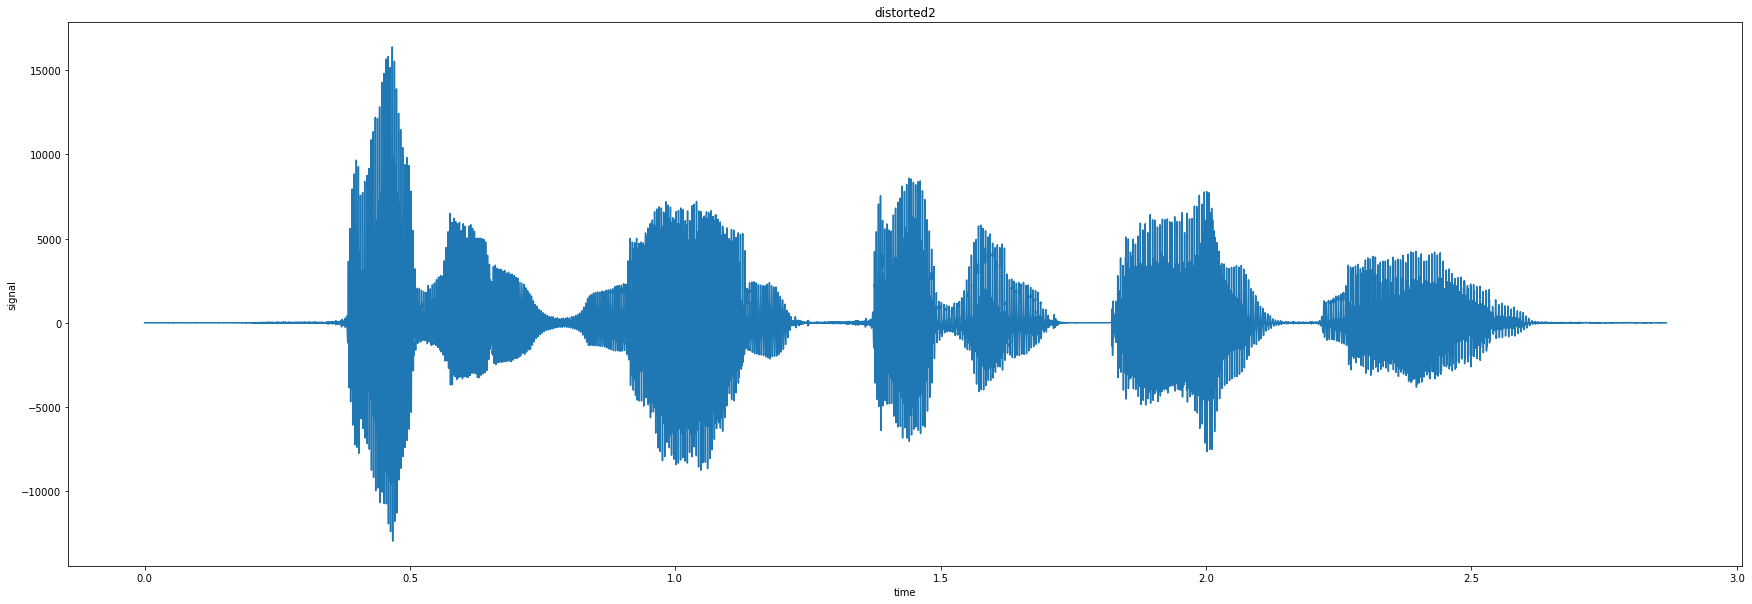

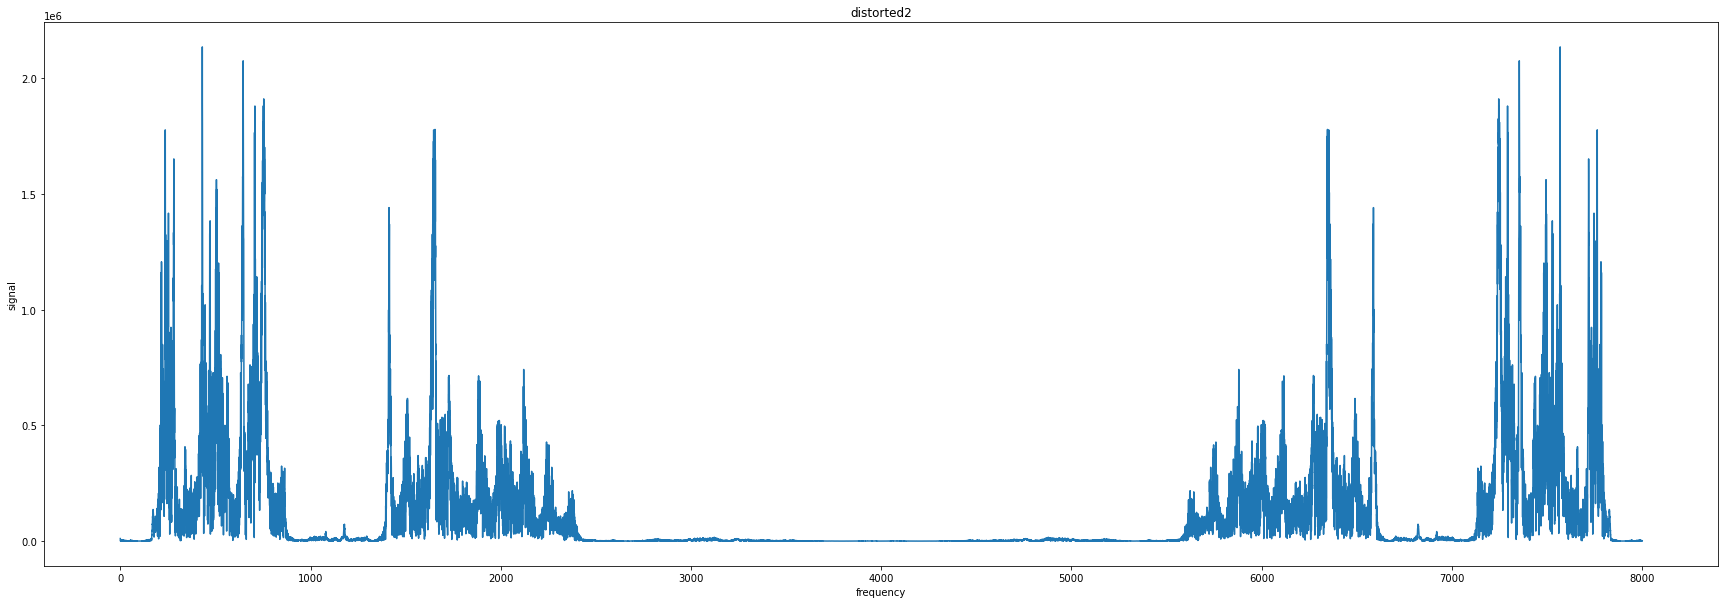

In [49]:
# signal
rate_distorted2, distorted2 = wavfile.read('./distorted2.wav')
length_distorted2 = distorted2.shape[0]/rate_distorted2
t_distorted2 = np.linspace(0, length_distorted2, distorted2.shape[0])
plot('time', 'signal', 'distorted2', t_distorted2, distorted2)
# fourier transform signal
distorted2_dft = np.fft.fft(distorted2)
f_distorted2 = np.linspace(0, rate_distorted2, distorted2_dft.shape[0])
plot('frequency', 'signal', 'distorted2', f_distorted2, np.abs(distorted2_dft))

we extend clean1 to be the size of distorted2 then plot clean1 and fourier transform of clean1

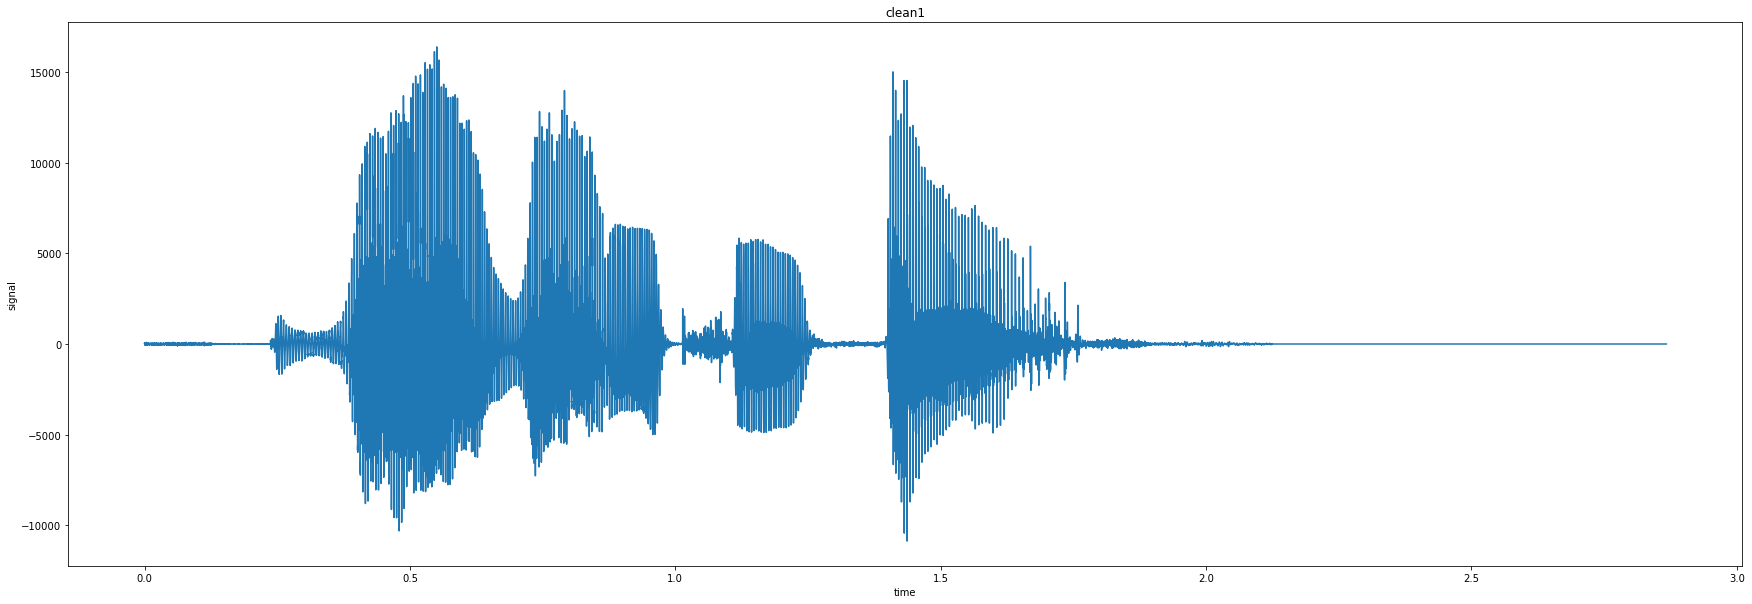

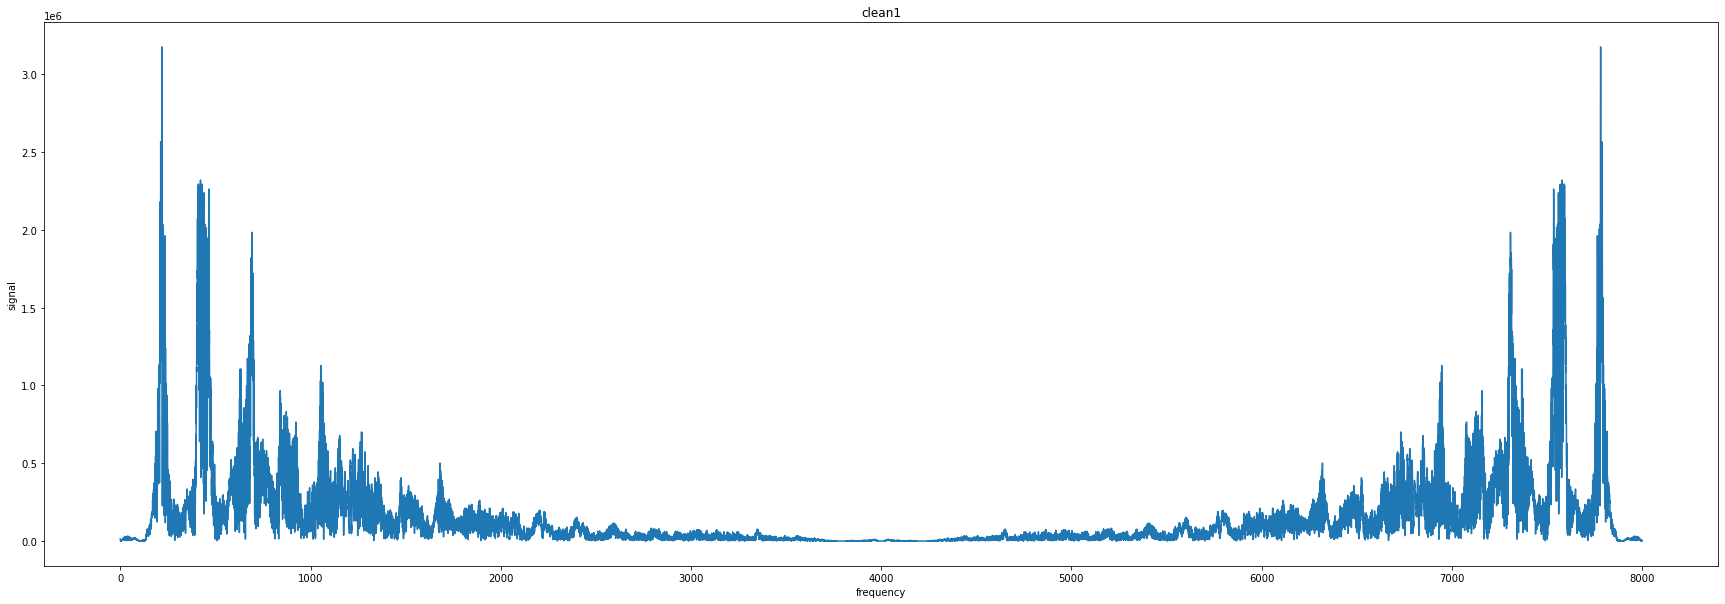

In [45]:
# signal
rate_clean1, clean1 = wavfile.read('./clean1.wav')
extend_clean1 = np.append(clean1, np.zeros(distorted2.shape[0]-clean1.shape[0]))
t_clean1 = np.linspace(0, length_distorted2, extend_clean1.shape[0])
plot('time', 'signal', 'clean1', t_clean1, extend_clean1)
# fourier transform signal
clean1_dft = np.fft.fft(extend_clean1)
f_clean1 = np.linspace(0, rate_clean1, clean1_dft.shape[0])
plot('frequency', 'signal', 'clean1', f_clean1, np.abs(clean1_dft))

we extend distorted1 to be the size of distorted2 then plot distorted1 and fourier transform of distorted1

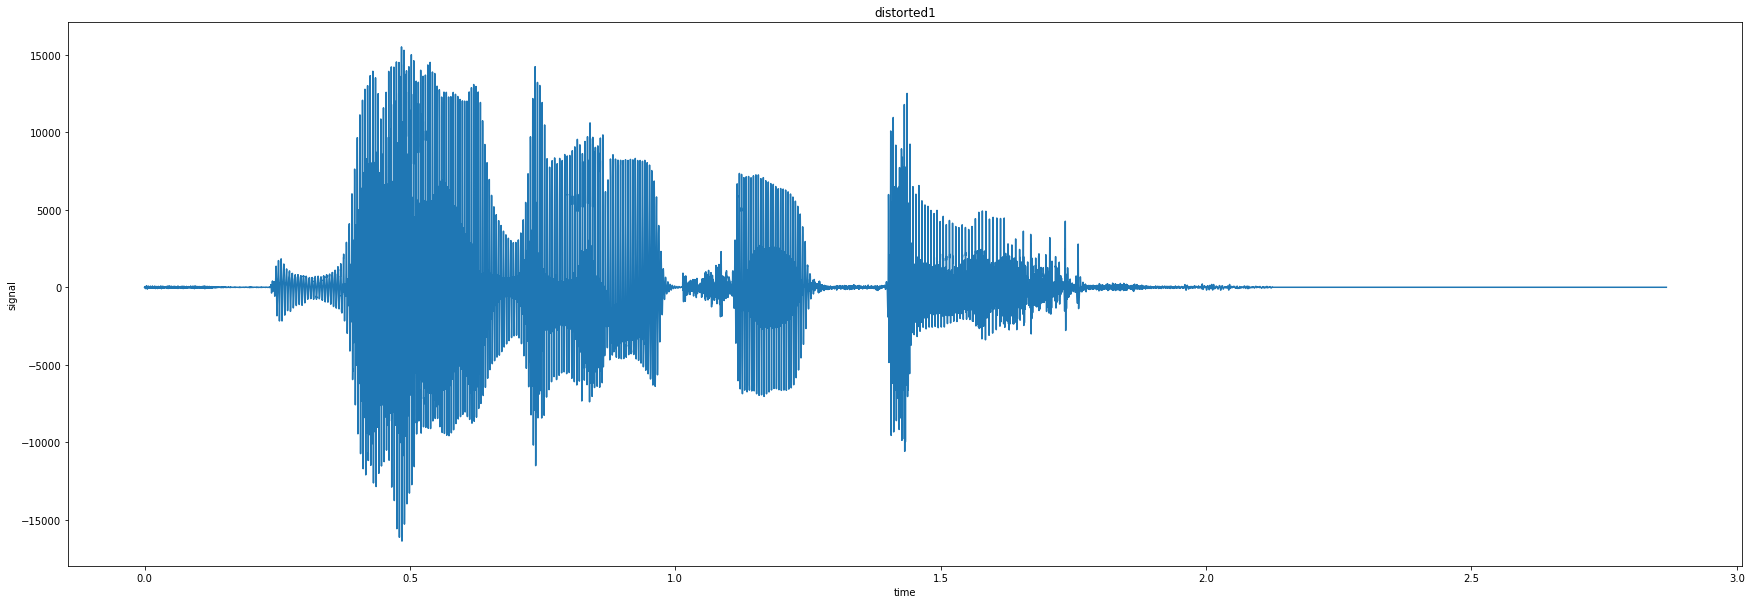

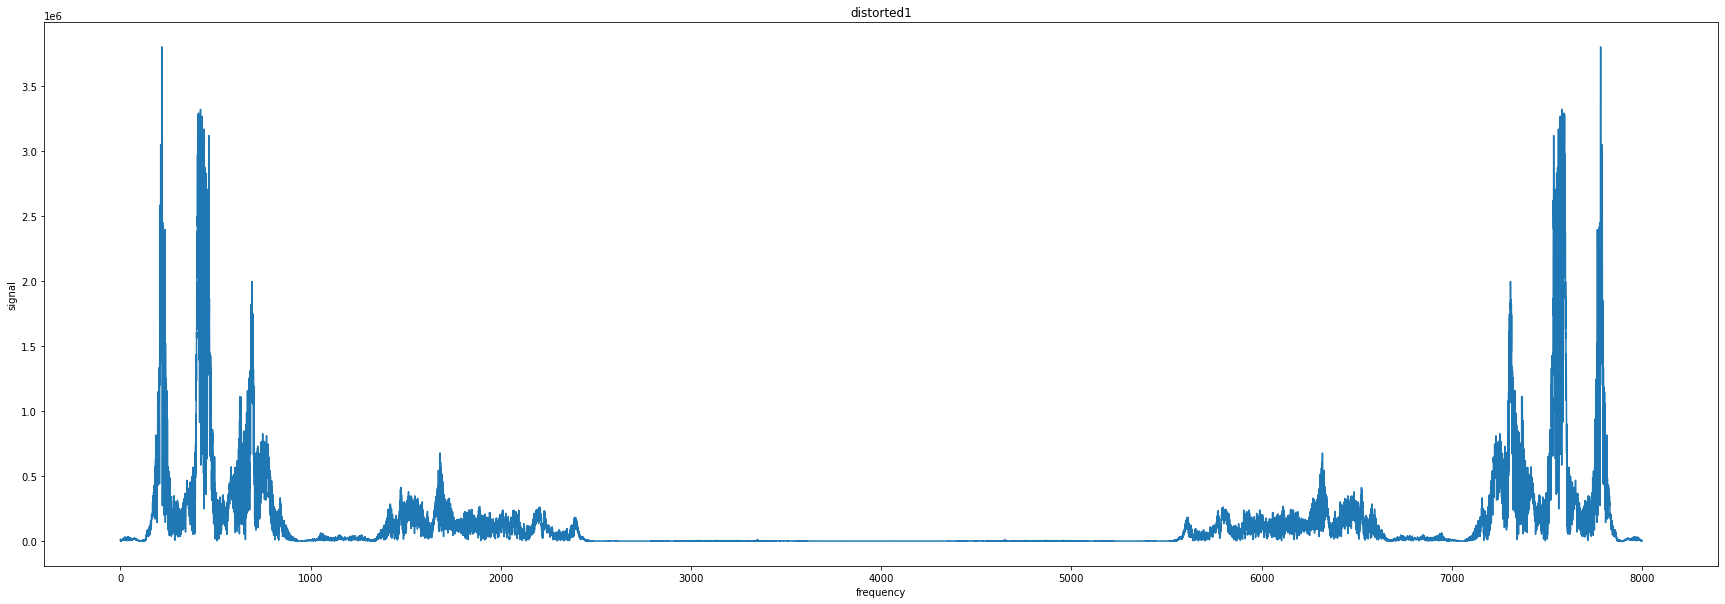

In [46]:
# signal
rate_distorted1, distorted1 = wavfile.read('./distorted1.wav')
extend_distorted1 = np.append(distorted1, np.zeros(distorted2.shape[0]-distorted1.shape[0]))
t_distorted1 = np.linspace(0, length_distorted2, extend_distorted1.shape[0])
plot('time', 'signal', 'distorted1', t_distorted1, extend_distorted1)
# fourier transform signal
distorted1_dft = np.fft.fft(extend_distorted1)
f_distorted1 = np.linspace(0, rate_distorted1, distorted1_dft.shape[0])
plot('frequency', 'signal', 'distorted1', f_distorted1, np.abs(distorted1_dft))

we divide distorted1_dft by clean1_dft to get the system’s frequency response, then we divide one by frequency response to get the inverse frequency response of the system. Then, we plot frequency_response and inverse_frequency_response

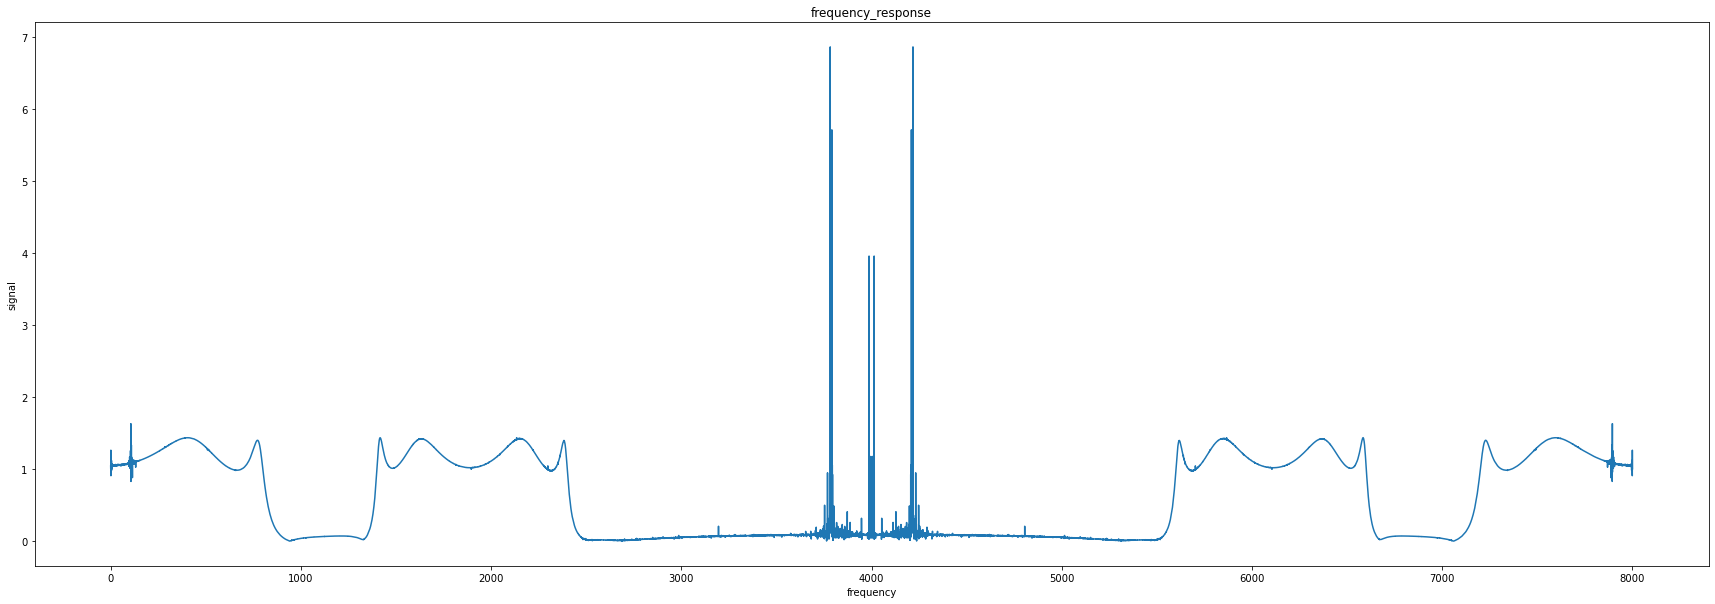

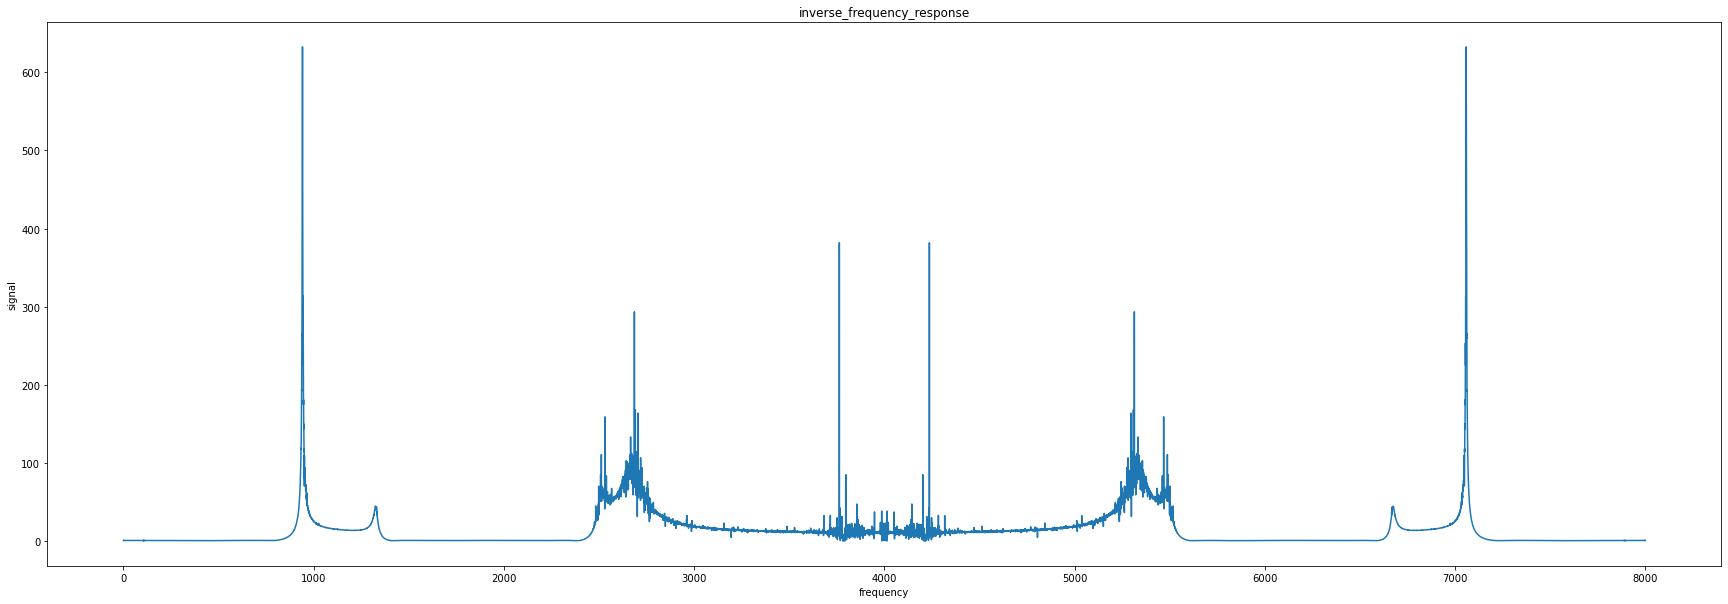

In [50]:
frequency_response = distorted1_dft / clean1_dft
f = np.linspace(0, rate_distorted1, frequency_response.shape[0])
plot('frequency', 'signal', 'frequency_response', f, np.abs(frequency_response))
inverse_frequency_response = 1 / frequency_response
plot('frequency', 'signal', 'inverse_frequency_response', f, np.abs(inverse_frequency_response))

we multiply distorted2_dft by inverse_frequency_response to get clean2_dft. Then, we plot clean2.

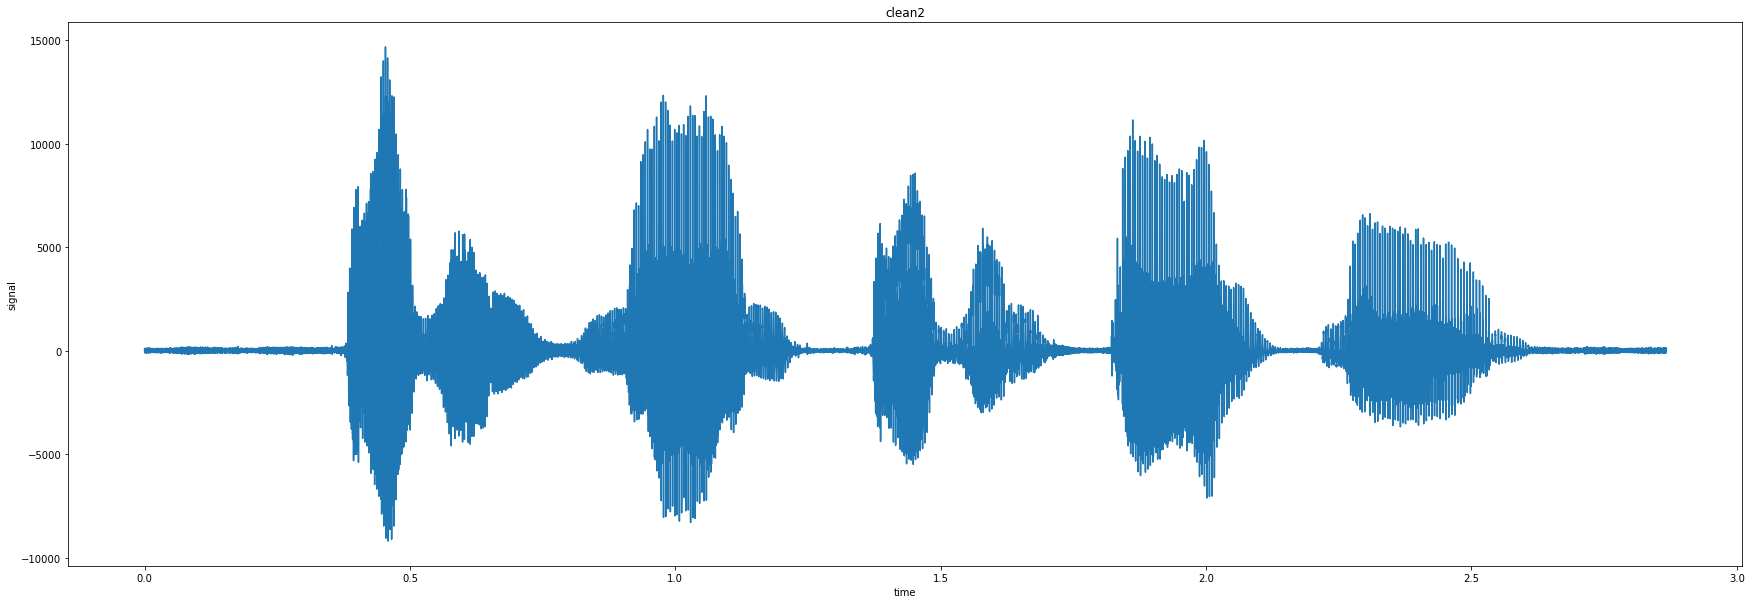

In [48]:
clean2_dft = distorted2_dft * inverse_frequency_response
clean2 = np.fft.ifft(clean2_dft)
length_clean2 = clean2.shape[0]/rate_distorted2
t_clean2 = np.linspace(0, length_clean2, clean2.shape[0])
wavfile.write("recovered2.wav", rate_distorted2, clean2.real)
plot('time', 'signal', 'clean2', t_clean2, clean2.real)